# The hippocampus as a predictive map
Kimberly L Stachenfeld, Matthew M Botvinick & Samuel J Gershman 

https://elifesciences.org/articles/34560

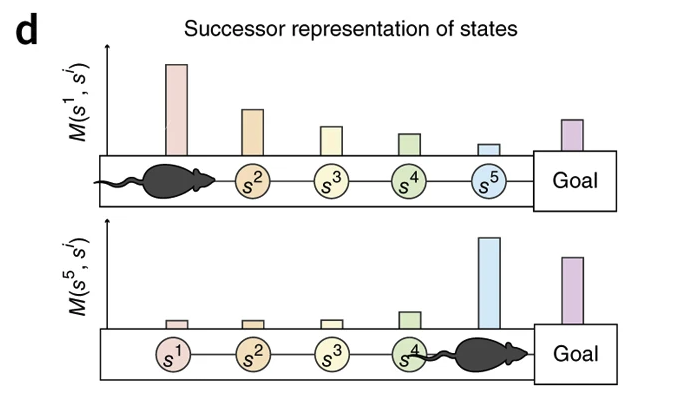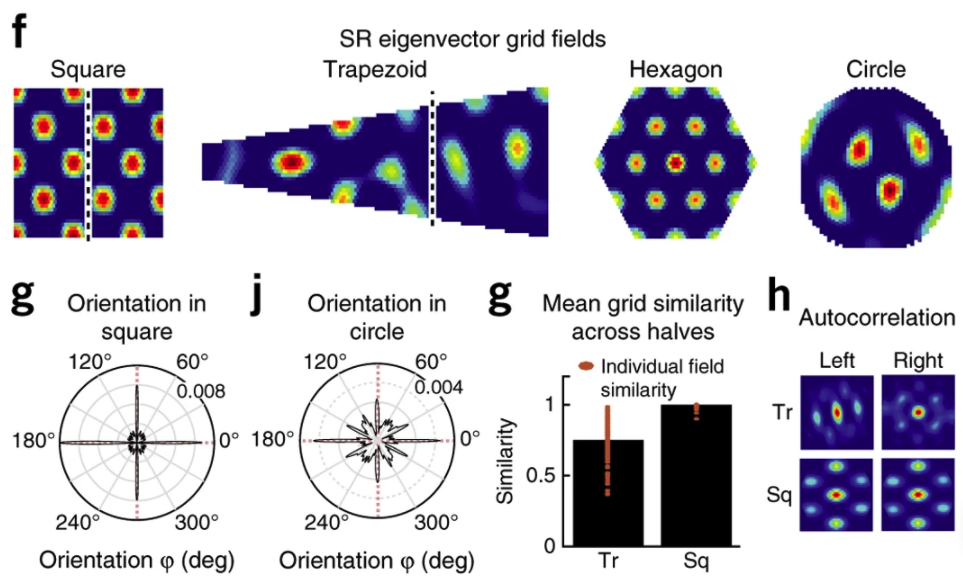

In [1]:
"""
Implementation for SR Kim
"""
import sys
sys.path.append("../")
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm


from sehec.envs.arenas.simple2d import Simple2D, Sargolini2006, Hafting2008,BasicSargolini2006
from sehec.models.SRKim import SR


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

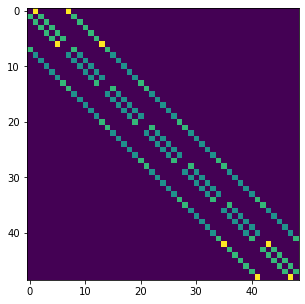

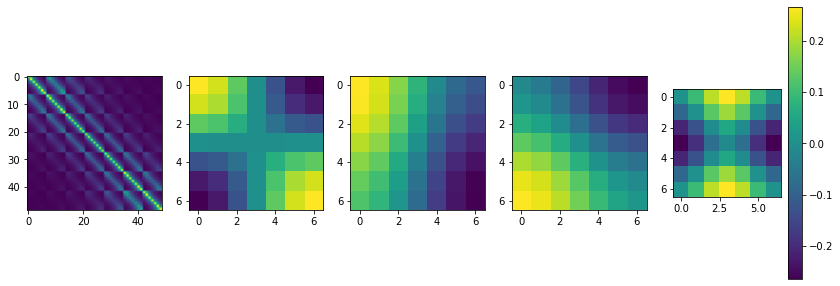

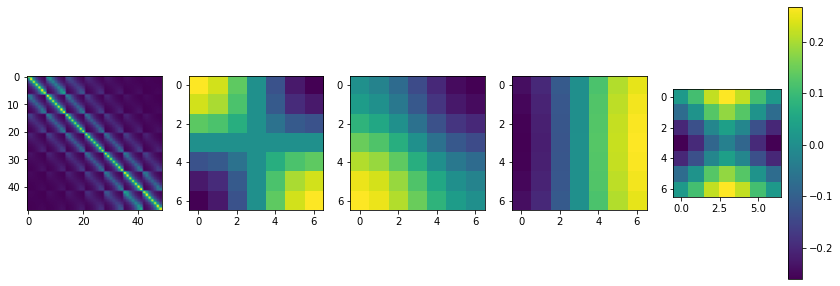

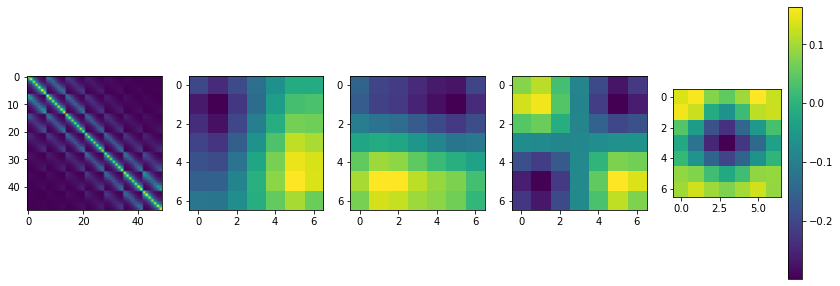

In [2]:
room_width = 7
room_depth = 7
env_name = "env_example"
time_step_size = 1  # seg
agent_step_size = 1

# Init environment
env = Simple2D(environment_name=env_name,
                       room_width=room_width,
                       room_depth=room_depth,
                       time_step_size=time_step_size,
                       agent_step_size=agent_step_size)
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 100
n_episode = 1000
state_density = 1/ agent_step_size


twoDvalue=True
agent = SR(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=env.room_width, room_depth=env.room_depth, state_density=state_density,twoD=twoDvalue)
    
# Choose your function depending on the type of env '2D_env' or '1D_env' + initialisies the smart as well
# Only run if twoDvalue=True
sr = agent.update_successor_rep()  # Choose your type of Update
sr_td = agent.update_successor_rep_td_full()  # Choose your type of Update
sr_sum= agent.successor_rep_sum()
agent.plot_eigen(sr, save_path=None)
agent.plot_eigen(sr_sum, save_path=None)
agent.plot_eigen(sr_td, save_path=None)

  0%|                                                                               | 0/1000 [00:00<?, ?it/s]/var/folders/lk/fjxx3prd2h31kn1cfccrk8fc0000gn/T/ipykernel_34268/2373774648.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  M_seq=np.asarray(K)
100%|████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.64it/s]


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

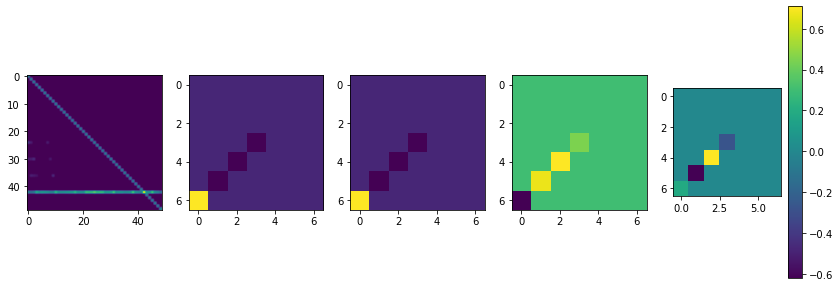

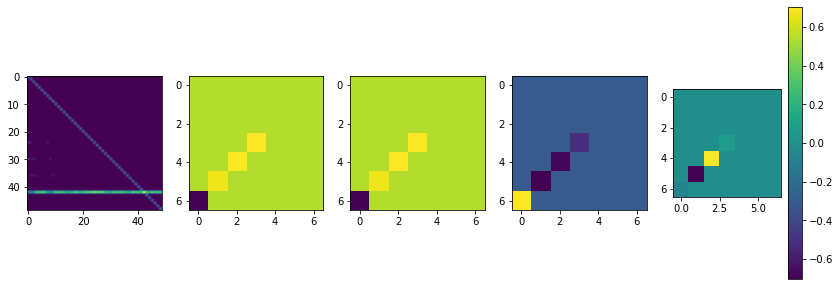

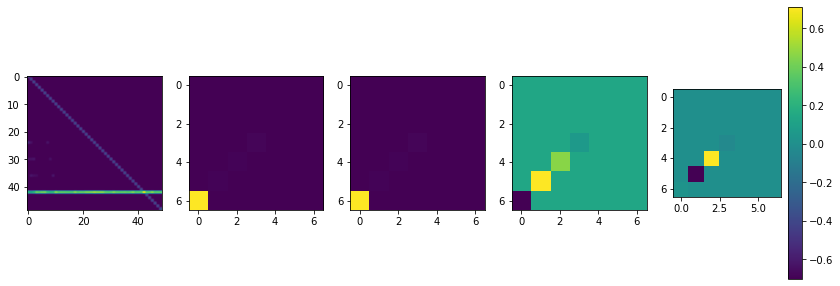

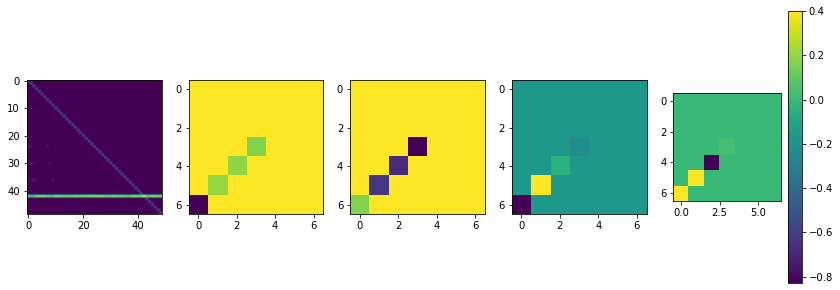

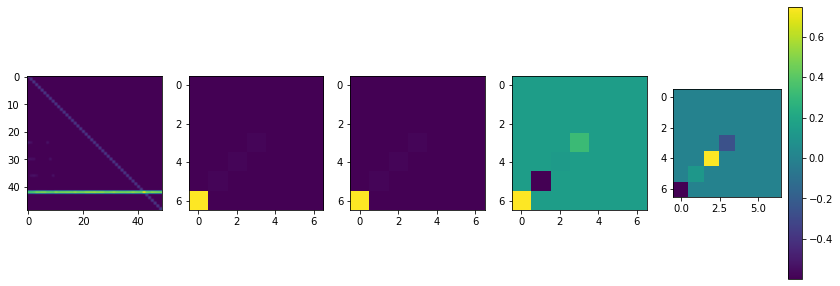

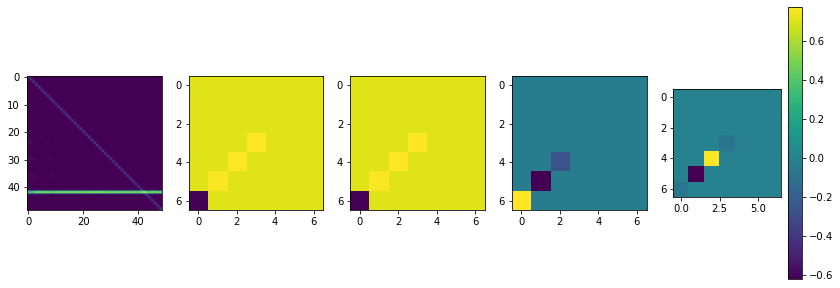

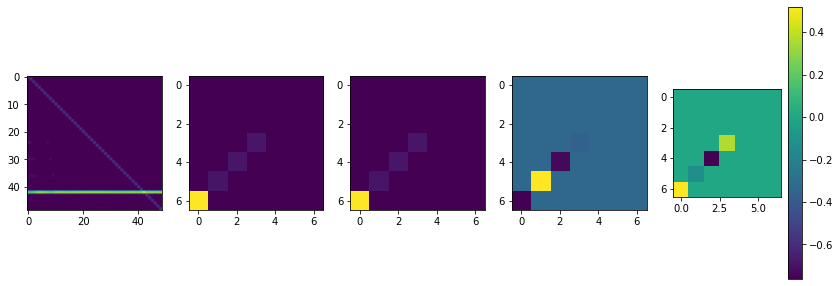

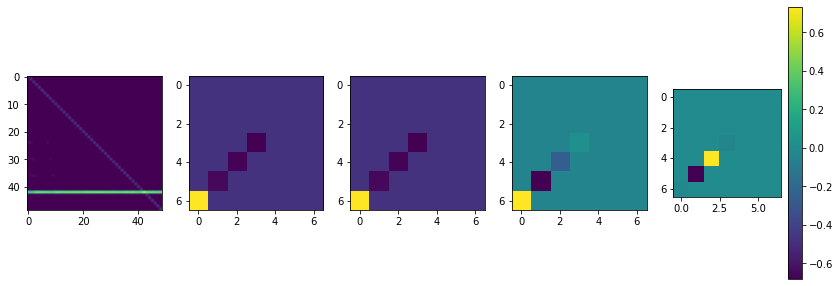

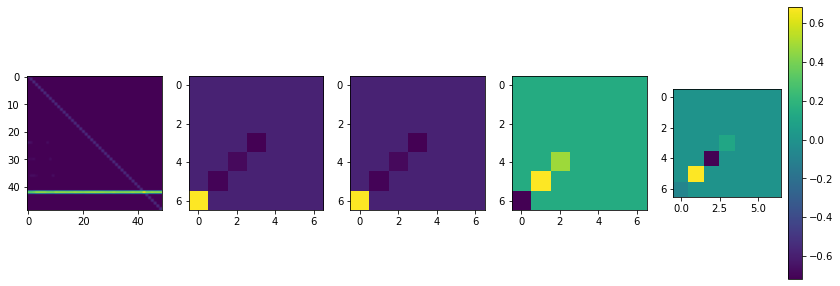

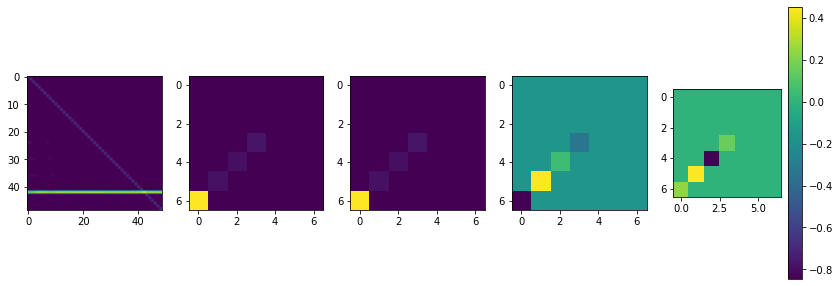

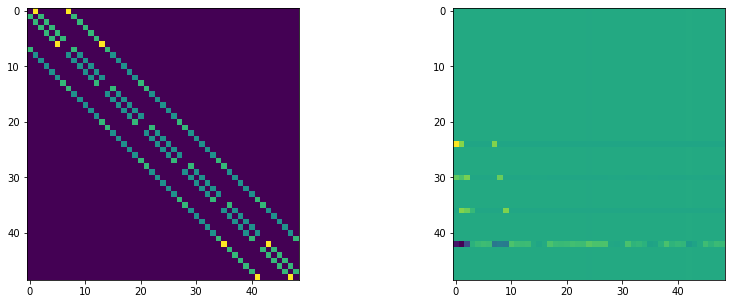

In [3]:
plot_every = 10000
total_iters = 0
obs, state = env.reset()

current_state=agent.obs_to_state(obs)
for i in tqdm(range(n_episode)):
     for j in range(t_episode):
                # Observe to choose an action
                action = agent.act(obs)  #the action is link to density of state to make sure we always land in a new
                obs, state, reward = env.step(action)
                new_state = agent.obs_to_state(obs)
                K = agent.update_successor_rep_td(new_state,current_state)
                M_seq=np.asarray(K)
                M_array_sq= M_seq.sum(axis=0)
                current_state=new_state
                total_iters += 1
                if total_iters % plot_every == 0:
                    agent.plot_eigen(M_array_sq, save_path=None)
T= agent.get_T_from_M( M_array_sq)
agent.plot_trantion(T, save_path=None)

In [4]:
data_path = "../environments/experiments/Sargolini2006/"
env = BasicSargolini2006(data_path=data_path,
                                 time_step_size=0.1,
                                 agent_step_size=None)

exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size =  10

discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 1000
n_episode = 5000
state_density = (1 / agent_step_size)
w = env.room_width * state_density
l = env.room_depth * state_density

agent = SR(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
                   room_width=env.room_width, room_depth=env.room_depth, state_density=state_density)

transmat = agent.create_transmat(state_density,
                                         '2D_env')
        # Choose your function depending on the type of env '2D_env' or '1D_env' + initialisies the smart as well
sr = agent.update_successor_rep(transmat)  # Choose your type of Update
agent.plot_eigen(sr, save_path=None)

       

FileNotFoundError: [Errno 2] No such file or directory: '../environments/experiments/Sargolini2006/sargolini_x_pos_0.npy'

In [ ]:
plot_every = 100000
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
current_state = agent.obs_to_state(obs)
for i in tqdm(range(1000000)):
# Observe to choose an action
    action = agent.act(obs) # the action is link to density of state to make sure we always land in a new
    obs, state, reward = env.step(action)
    obs= obs[:2]
    new_state = agent.obs_to_state(obs)
    K = agent.update_successor_rep_td(new_state, current_state)
    M_seq = np.asarray(K)
    M_array_sq = M_seq.sum(axis=0)
    current_state = new_state
    total_iters += 1
    if total_iters % plot_every == 0:
        agent.plot_eigen(M_array_sq, save_path=None)